In [25]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [26]:
def read_data():
    """Read data from a CSV file with columns x,y,z,rot_x,rot_y,rot_z.
    Returns a numpy array of data."""
    import os
    
    filePath = "data.csv"
    
    if not os.path.exists(filePath):
        print(f"Warning: {filePath} not found. Create test data first.")
        return None
    
    try:
        data = np.loadtxt(filePath, delimiter=",", skiprows=1)
        print(f"Successfully loaded {len(data)} data points from {filePath}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

In [27]:
def create_test_data():
    """Create a test dataset if data.csv doesn't exist"""
    import os
    
    if not os.path.exists("data.csv"):
        print("Creating test data.csv file...")
        # Create sample data: x, y, z, rot_x, rot_y, rot_z
        test_data = np.array([
            [0.5, 0.0, 0.0, 0, 0, 0],       # X-axis vector
            [0.5, 0.0, 0.0, 0, 90, 0],      # X-axis rotated 90° around Y
            [0.0, 0.5, 0.0, 0, 0, 0],       # Y-axis vector
            [0.0, 0.5, 0.0, 90, 0, 0],      # Y-axis rotated 90° around X
            [0.0, 0.0, 0.5, 0, 0, 0],       # Z-axis vector
            [0.0, 0.0, 0.5, 0, 90, 0]       # Z-axis rotated 90° around Y
        ])
        
        # Save to CSV with header
        header = "x,y,z,rot_x,rot_y,rot_z"
        np.savetxt("data.csv", test_data, delimiter=",", header=header, comments='')
        print("Test data created successfully!")
    else:
        print("data.csv already exists.")

In [28]:
def translate_and_rotate_points(data_entries):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = ['r', 'b', 'g', 'c', 'm', 'y']
    
    for i, data in enumerate(data_entries):
        # Extract coordinates and rotations
        x, y, z = data[0], data[1], data[2]
        rot_x, rot_y, rot_z = data[3], data[4], data[5]

        # Convert rotations to radians
        rot_x_rad = np.deg2rad(rot_x)
        rot_y_rad = np.deg2rad(rot_y)
        rot_z_rad = np.deg2rad(rot_z)

        # Create the rotation object
        rotation = R.from_euler('xyz', [rot_x_rad, rot_y_rad, rot_z_rad])

        # Apply the rotation to the point
        original_point = np.array([x, y, z])
        rotated_point = rotation.apply(original_point)

        # Print the original and rotated points
        print(f"Data point {i+1}:")
        print(f"  Original Point: ({x:.2f}, {y:.2f}, {z:.2f})")
        print(f"  Rotation (deg): ({rot_x:.2f}, {rot_y:.2f}, {rot_z:.2f})")
        print(f"  Rotated Point: ({rotated_point[0]:.2f}, {rotated_point[1]:.2f}, {rotated_point[2]:.2f})")
        print()

        # Select color from cycle
        color_idx = i % len(colors)
        
        # Draw original vector
        ax.quiver(0, 0, 0, x, y, z, color=colors[color_idx], 
                 label=f'Original Point {i+1}', alpha=0.7)
        
        # Draw rotated vector
        ax.quiver(0, 0, 0, rotated_point[0], rotated_point[1], rotated_point[2], 
                 color=colors[color_idx], linestyle='dashed', 
                 label=f'Rotated Point {i+1}', alpha=0.7)
    
    # Find the maximum absolute value for axis scaling
    max_val = np.max(np.abs(data_entries[:, :6]))
    ax.set_xlim([-max_val*1.2, max_val*1.2])
    ax.set_ylim([-max_val*1.2, max_val*1.2])
    ax.set_zlim([-max_val*1.2, max_val*1.2])
    
    # Add labels and grid
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.grid(True)
    
    # Add title and legend
    plt.title('3D Vector Rotation Visualization')
    ax.legend(loc='best')
    
    # Draw coordinate axes
    ax.quiver(0, 0, 0, max_val*0.2, 0, 0, color='k', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, max_val*0.2, 0, color='k', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, 0, max_val*0.2, color='k', arrow_length_ratio=0.1)
    
    ax.text(max_val*0.25, 0, 0, "X", color='k')
    ax.text(0, max_val*0.25, 0, "Y", color='k')
    ax.text(0, 0, max_val*0.25, "Z", color='k')
    
    plt.tight_layout()
    plt.show()

data.csv already exists.
Successfully loaded 5 data points from data.csv
Data point 1:
  Original Point: (65465.00, 52306.00, 8760.00)
  Rotation (deg): (63370.00, 388.00, 352.00)
  Rotated Point: (72430.24, 40302.07, -15097.17)

Data point 2:
  Original Point: (438.00, 51558.00, 7414.00)
  Rotation (deg): (63569.00, 570.00, 105.00)
  Rotated Point: (36109.54, 25578.20, 27481.69)

Data point 3:
  Original Point: (496.00, 50831.00, 6190.00)
  Rotation (deg): (63666.00, 65296.00, 65338.00)
  Rotated Point: (25162.32, -35785.48, 26619.72)

Data point 4:
  Original Point: (169.00, 50103.00, 3763.00)
  Rotation (deg): (64294.00, 65248.00, 898.00)
  Rotated Point: (32469.28, 38323.21, -1255.56)

Data point 5:
  Original Point: (127.00, 49816.00, 2192.00)
  Rotation (deg): (64267.00, 65385.00, 65193.00)
  Rotated Point: (31599.23, -38116.71, 5921.10)



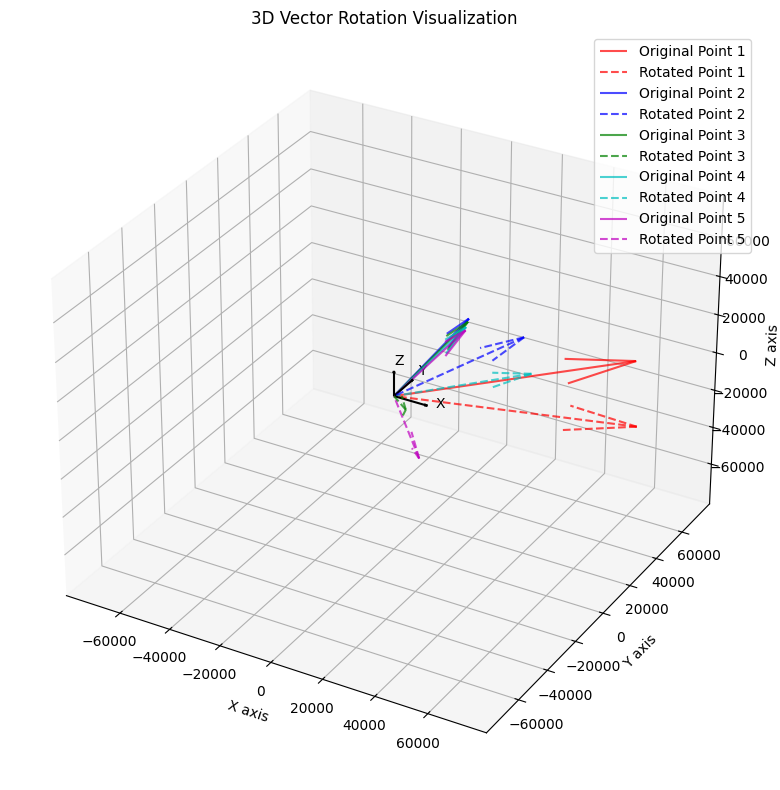

In [29]:
# Run this cell to load and visualize data
create_test_data()  # Create test data if data.csv doesn't exist
data = read_data()

if data is not None and len(data) > 0:
    translate_and_rotate_points(data)
else:
    print("No data available to visualize.")